In [1]:
import os
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import KFold
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from surprise.prediction_algorithms import matrix_factorization

#### Predictions look like this:

Prediction(uid='287', iid='1240', r_ui=5.0, est=4.0088279870131247, details={'actual_k': 30, 'was_impossible': False})

In [2]:
def compute_precision_recall(predictions, t, threshold):
    estimated_truth = defaultdict(list)
    for user_id, _, ground_truth, estimate, _ in predictions:
        estimated_truth[user_id].append((estimate, ground_truth))
        
    user_precision = dict()
    user_recall = dict()
    for user_id, user_rating in estimated_truth.items():
        user_rating.sort(key=lambda x: x[0], reverse=True)
        relevant_items = sum((ground_truth >= threshold) for (_, ground_truth) in user_rating)
        recommended_items_in_top_t = sum((estimate >= threshold) for (estimate, _) in user_rating[:t])
        relevant_and_recommended_items_in_top_t = sum(((ground_truth >= threshold) and (estimate >= threshold))
                              for (estimate, ground_truth) in user_rating[:t])
        user_precision[user_id] = relevant_and_recommended_items_in_top_t / recommended_items_in_top_t if recommended_items_in_top_t != 0 else 1
        user_recall[user_id] = relevant_and_recommended_items_in_top_t / relevant_items if relevant_items !=0 else 1
        
    return user_precision, user_recall

### Question 36

In [3]:
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
kf = KFold(n_splits=10)
sim_options = {'name': 'pearson'}
algo = KNNBasic(k=30, sim_options=sim_options)

averaged_precision_for_t_knn = []
averaged_recall_for_t_knn = []
for t in range(1,26,1):
    print(t)
    averaged_precision = []
    averaged_recall = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precision, recall = compute_precision_recall(predictions, t, 3)
    
        # average over all users
    
        averaged_precision.append(sum(precision for precision in precision.values()) / len(precision))
        averaged_recall.append(sum(recall for recall in recall.values()) / len(recall))
    
    averaged_precision_for_t_knn.append(np.mean(averaged_precision))
    averaged_recall_for_t_knn.append(np.mean(averaged_recall))

1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
12
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
23
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix

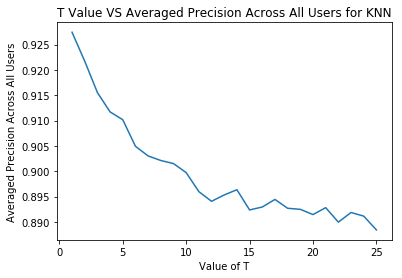

In [4]:
x = range(1,len(averaged_precision_for_t_knn)+1)
y = averaged_precision_for_t_knn
plt.xlabel("Value of T")
plt.ylabel("Averaged Precision Across All Users", rotation=90)
plt.title("T Value VS Averaged Precision Across All Users for KNN")
plt.plot(x, y)
plt.show()

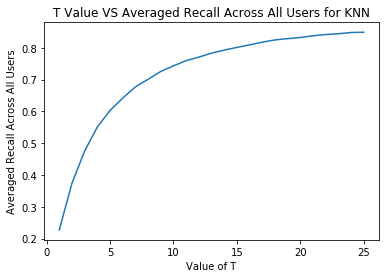

In [5]:
x = range(1,len(averaged_recall_for_t_knn)+1)
y = averaged_recall_for_t_knn
plt.xlabel("Value of T")
plt.ylabel("Averaged Recall Across All Users", rotation=90)
plt.title("T Value VS Averaged Recall Across All Users for KNN")
plt.plot(x, y)
plt.show()

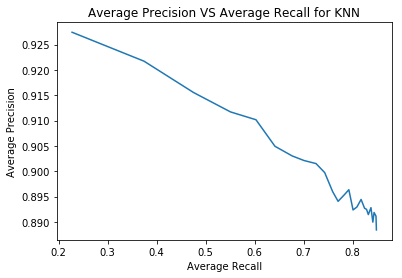

In [6]:
x = averaged_recall_for_t_knn
y = averaged_precision_for_t_knn
x_new = sorted(x)
y_new = [y[x.index(i)] for i in x_new]
plt.xlabel("Average Recall")
plt.ylabel("Average Precision", rotation=90)
plt.title("Average Precision VS Average Recall for KNN")
plt.plot(x_new, y_new)
plt.show()

### Question 37

In [7]:
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
kf = KFold(n_splits=10)
algo = matrix_factorization.NMF(n_factors=18)

averaged_precision_for_t_nmf = []
averaged_recall_for_t_nmf = []
for t in range(1,26,1):
    print(t)
    averaged_precision = []
    averaged_recall = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precision, recall = compute_precision_recall(predictions, t, 3)
        # average over all users
        averaged_precision.append(sum(precision for precision in precision.values()) / len(precision))
        averaged_recall.append(sum(recall for recall in recall.values()) / len(recall))
    averaged_precision_for_t_nmf.append(np.mean(averaged_precision))
    averaged_recall_for_t_nmf.append(np.mean(averaged_recall))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


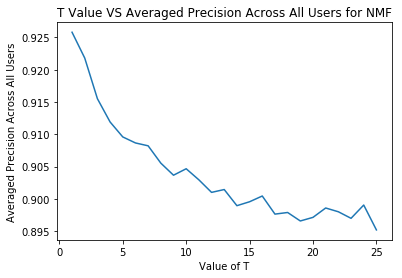

In [8]:
x = range(1,len(averaged_precision_for_t_nmf)+1)
y = averaged_precision_for_t_nmf
plt.xlabel("Value of T")
plt.ylabel("Averaged Precision Across All Users", rotation=90)
plt.title("T Value VS Averaged Precision Across All Users for NMF")
plt.plot(x, y)
plt.show()

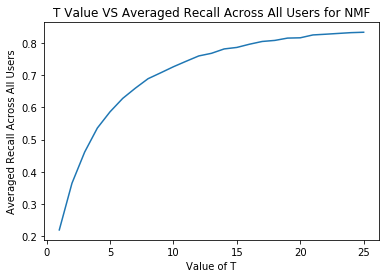

In [9]:
x = range(1,len(averaged_recall_for_t_nmf)+1)
y = averaged_recall_for_t_nmf
plt.xlabel("Value of T")
plt.ylabel("Averaged Recall Across All Users", rotation=90)
plt.title("T Value VS Averaged Recall Across All Users for NMF")
plt.plot(x, y)
plt.show()

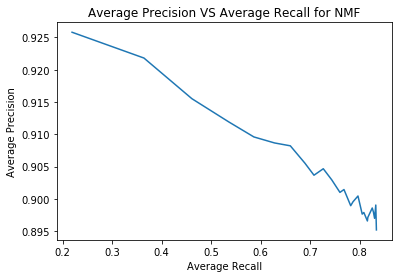

In [10]:
x = averaged_recall_for_t_nmf
y = averaged_precision_for_t_nmf
x_new = sorted(x)
y_new = [y[x.index(i)] for i in x_new]
plt.xlabel("Average Recall")
plt.ylabel("Average Precision", rotation=90)
plt.title("Average Precision VS Average Recall for NMF")
plt.plot(x_new, y_new)
plt.show()

### Question 38

In [11]:
file_path = os.path.expanduser('/Users/ashwin/Documents/Winter 2018/219/project3/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
kf = KFold(n_splits=10)
algo = matrix_factorization.SVD(n_factors=12)

averaged_precision_for_t_mf = []
averaged_recall_for_t_mf = []
for t in range(1,26,1):
    print(t)
    averaged_precision = []
    averaged_recall = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precision, recall = compute_precision_recall(predictions, t, 3)
    
        # average over all users
    
        averaged_precision.append(sum(precision for precision in precision.values()) / len(precision))
        averaged_recall.append(sum(recall for recall in recall.values()) / len(recall))
    
    averaged_precision_for_t_mf.append(np.mean(averaged_precision))
    averaged_recall_for_t_mf.append(np.mean(averaged_recall))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


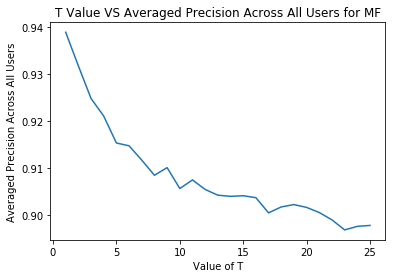

In [12]:
x = range(1,len(averaged_precision_for_t_mf)+1)
y = averaged_precision_for_t_mf
plt.xlabel("Value of T")
plt.ylabel("Averaged Precision Across All Users", rotation=90)
plt.title("T Value VS Averaged Precision Across All Users for MF")
plt.plot(x, y)
plt.show()

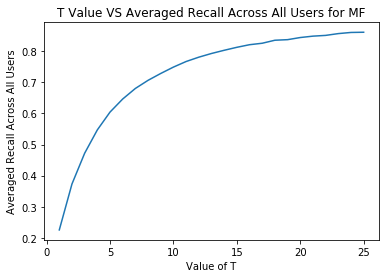

In [13]:
x = range(1,len(averaged_recall_for_t_mf)+1)
y = averaged_recall_for_t_mf
plt.xlabel("Value of T")
plt.ylabel("Averaged Recall Across All Users", rotation=90)
plt.title("T Value VS Averaged Recall Across All Users for MF")
plt.plot(x, y)
plt.show()

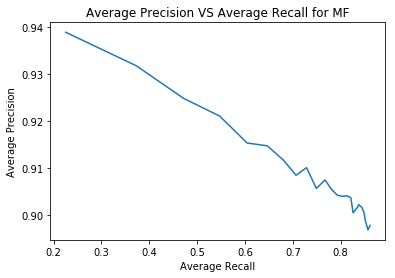

In [14]:
x = averaged_recall_for_t_mf
y = averaged_precision_for_t_mf
x_new = sorted(x)
y_new = [y[x.index(i)] for i in x_new]
plt.xlabel("Average Recall")
plt.ylabel("Average Precision", rotation=90)
plt.title("Average Precision VS Average Recall for MF")
plt.plot(x_new, y_new)
plt.show()

### Question 39

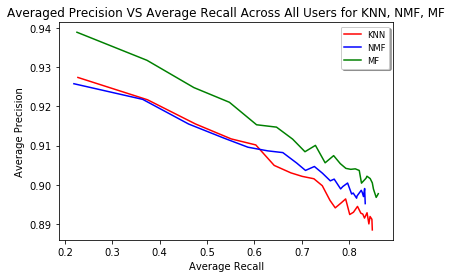

In [15]:
x = averaged_recall_for_t_knn
y = averaged_precision_for_t_knn
x_new = sorted(x)
y_new = [y[x.index(i)] for i in x_new]
plt.plot(x_new,y_new,'r', label='KNN')
x = averaged_recall_for_t_nmf
y = averaged_precision_for_t_nmf
x_new = sorted(x)
y_new = [y[x.index(i)] for i in x_new]
plt.plot(x_new,y_new,'b',label='NMF')
x = averaged_recall_for_t_mf
y = averaged_precision_for_t_mf
x_new = sorted(x)
y_new = [y[x.index(i)] for i in x_new]
plt.plot(x_new,y_new,'g', label='MF')
plt.legend(loc='upper right', shadow=True, fontsize='small')
plt.xlabel("Average Recall")
plt.ylabel("Average Precision", rotation=90)
plt.title("Averaged Precision VS Average Recall Across All Users for KNN, NMF, MF")
plt.show()